In [1]:
import Pkg
Pkg.activate("../../../FinancialPlanner")

  Activating project at `c:\Users\matsz\programowanie\Optymalizacja_portfela\FinancialPlanner`


In [2]:
using Revise
using LinearAlgebra
using Distributions
using Random
using StatsPlots
using PDMats
using StatsBase
using Base.Iterators
using DataFrames, TimeSeries, XLSX
using PrettyTables

In [3]:
includet("../VARs/utils.jl")
includet("../VARs/VAR_OLS.jl")

In [4]:
df = DataFrame(XLSX.readtable("../../data/usa_macro_data.xlsx", "Quarterly", infer_eltypes=true))
data_source = collapse(TimeArray(df; timestamp = :observation_date), Dates.quarter, first)

display(returns_summarystats(data_source, 1)) 

,std,max,mean,p75th,min,skewness,p25th,autocor,kurtosis,sr,median
A939RX0Q048SBEA,14747.7,68696.0,40245.4,54126.5,18032.0,0.1437,27572.0,0.9887,-1.2415,2.7289,39691.0
GDPDEF,32.7932,125.532,57.1572,85.8735,13.675,0.1832,22.089,0.9889,-1.1966,1.743,57.826
TB3MS,3.068,15.05,4.2468,5.705,0.01,0.798,1.945,0.9729,0.9205,1.3842,4.23
GS10,2.8911,14.85,5.6289,7.365,0.65,0.854,3.63,0.9853,0.4842,1.947,4.98
Price_10Y,1693.98,5588.73,1619.78,2790.36,108.272,0.8096,182.663,0.9916,-0.8309,0.9562,799.867
Stock_Price,1155.26,5446.68,887.969,1284.31,36.79,1.8486,95.46,0.9678,3.0694,0.7686,330.45
Dividend,18.171,71.9758,17.0102,22.755,1.5533,1.4778,3.165,0.9818,1.2258,0.9361,10.9233
E,47.3465,197.883,40.6421,60.17,2.8333,1.6168,5.945,0.9754,2.0048,0.8584,17.8633
CAPE,8.0844,43.2083,20.9759,25.9614,6.6434,0.4623,15.5916,0.9796,-0.1197,2.5946,20.5076
USACPIALLQINMEI,35.7757,132.851,55.6431,86.7908,11.265,0.2901,17.6359,0.9887,-1.1685,1.5553,53.1045


nothing

In [5]:
data_source[:GDPDEF]

279×1 TimeArray{Float64, 1, Date, Vector{Float64}} 1955-01-01 to 2024-07-01
┌────────────┬─────────┐
│            │ GDPDEF  │
├────────────┼─────────┤
│ 1955-01-01 │  13.675 │
│ 1955-04-01 │  13.731 │
│ 1955-07-01 │  13.827 │
│ 1955-10-01 │  13.964 │
│ 1956-01-01 │  14.104 │
│ 1956-04-01 │  14.187 │
│ 1956-07-01 │  14.365 │
│ 1956-10-01 │  14.423 │
│     ⋮      │    ⋮    │
│ 2023-01-01 │ 121.251 │
│ 2023-04-01 │ 121.804 │
│ 2023-07-01 │ 122.768 │
│ 2023-10-01 │ 123.241 │
│ 2024-01-01 │ 124.163 │
│ 2024-04-01 │ 124.943 │
│ 2024-07-01 │ 125.532 │
└────────────┴─────────┘
        264 rows omitted

In [6]:
freq = 1

cpi = (log.(data_source[:GDPDEF]) .- lag(log.(data_source[:GDPDEF]),4)) .* 100 
gdp = (log.(data_source[:A939RX0Q048SBEA]) .- lag(log.(data_source[:A939RX0Q048SBEA]),4)) .* 100 
sr = (data_source[:TB3MS]) .- cpi
term = (data_source[:GS10]) .- (data_source[:TB3MS])
#Δd = (log.(data_source[:Dividend]) .- lag(log.(data_source[:Dividend]),4)) .* 100 .- cpi
Δd = percentchange(data_source[:Dividend], :log) .* 100 .- cpi
dy = round.((log.(data_source[:Dividend]) .- log.(data_source[:Stock_Price])), digits=2)

data= merge(gdp, cpi, sr, term, Δd, dy)

start = Date(1985, 01,01)
end_d = Date(2024, 12, 31)
s_data = to(from(data, start),end_d)

display(returns_summarystats(s_data, freq)) 
display(cor(values(s_data)))



,std,max,mean,p75th,min,skewness,p25th,autocor,kurtosis,sr,median
A939RX0Q048SBEA_A939RX0Q048SBEA,1.9201,11.4109,1.7029,2.8079,-8.2584,-0.8873,1.0132,0.6838,8.7904,0.8869,1.8675
GDPDEF_GDPDEF,1.1793,7.4709,2.3319,2.7695,0.1153,1.7607,1.6577,0.9458,4.7314,1.9773,2.0521
TB3MS_GDPDEF_GDPDEF,2.4086,4.7148,0.8506,3.1995,-6.4539,-0.4414,-0.9039,0.9656,-0.1208,0.3531,0.6274
GS10_TB3MS,1.2048,3.7,1.6401,2.655,-1.48,-0.299,0.74,0.9159,-0.6069,1.3614,1.65
Dividend_GDPDEF_GDPDEF,1.7783,3.0682,-0.908,0.2542,-6.77,-0.7267,-1.8161,0.9046,0.9259,-0.5106,-0.7107
Dividend_Stock_Price,0.3208,-3.17,-3.8762,-3.595,-4.5,0.3421,-4.095,0.9538,-0.6936,-12.0821,-3.93


nothing

6×6 Matrix{Float64}:
  1.0        0.262863    0.122466   -0.101136    0.181997   -0.174588
  0.262863   1.0        -0.143025   -0.217046   -0.351201    0.0701478
  0.122466  -0.143025    1.0        -0.23493    -0.0136415   0.355108
 -0.101136  -0.217046   -0.23493     1.0        -0.0374218   0.402236
  0.181997  -0.351201   -0.0136415  -0.0374218   1.0        -0.030389
 -0.174588   0.0701478   0.355108    0.402236   -0.030389    1.0

In [7]:
s_data[:GDPDEF_GDPDEF]

159×1 TimeArray{Float64, 1, Date, Vector{Float64}} 1985-01-01 to 2024-07-01
┌────────────┬───────────────┐
│            │ GDPDEF_GDPDEF │
├────────────┼───────────────┤
│ 1985-01-01 │       3.46524 │
│ 1985-04-01 │       3.25498 │
│ 1985-07-01 │        2.9721 │
│ 1985-10-01 │       2.78471 │
│ 1986-01-01 │       2.29697 │
│ 1986-04-01 │       2.03333 │
│ 1986-07-01 │       1.84041 │
│ 1986-10-01 │       1.82644 │
│     ⋮      │       ⋮       │
│ 2023-01-01 │       5.18964 │
│ 2023-04-01 │       3.40108 │
│ 2023-07-01 │        3.0694 │
│ 2023-10-01 │       2.53426 │
│ 2024-01-01 │       2.37324 │
│ 2024-04-01 │       2.54444 │
│ 2024-07-01 │       2.22643 │
└────────────┴───────────────┘
              144 rows omitted

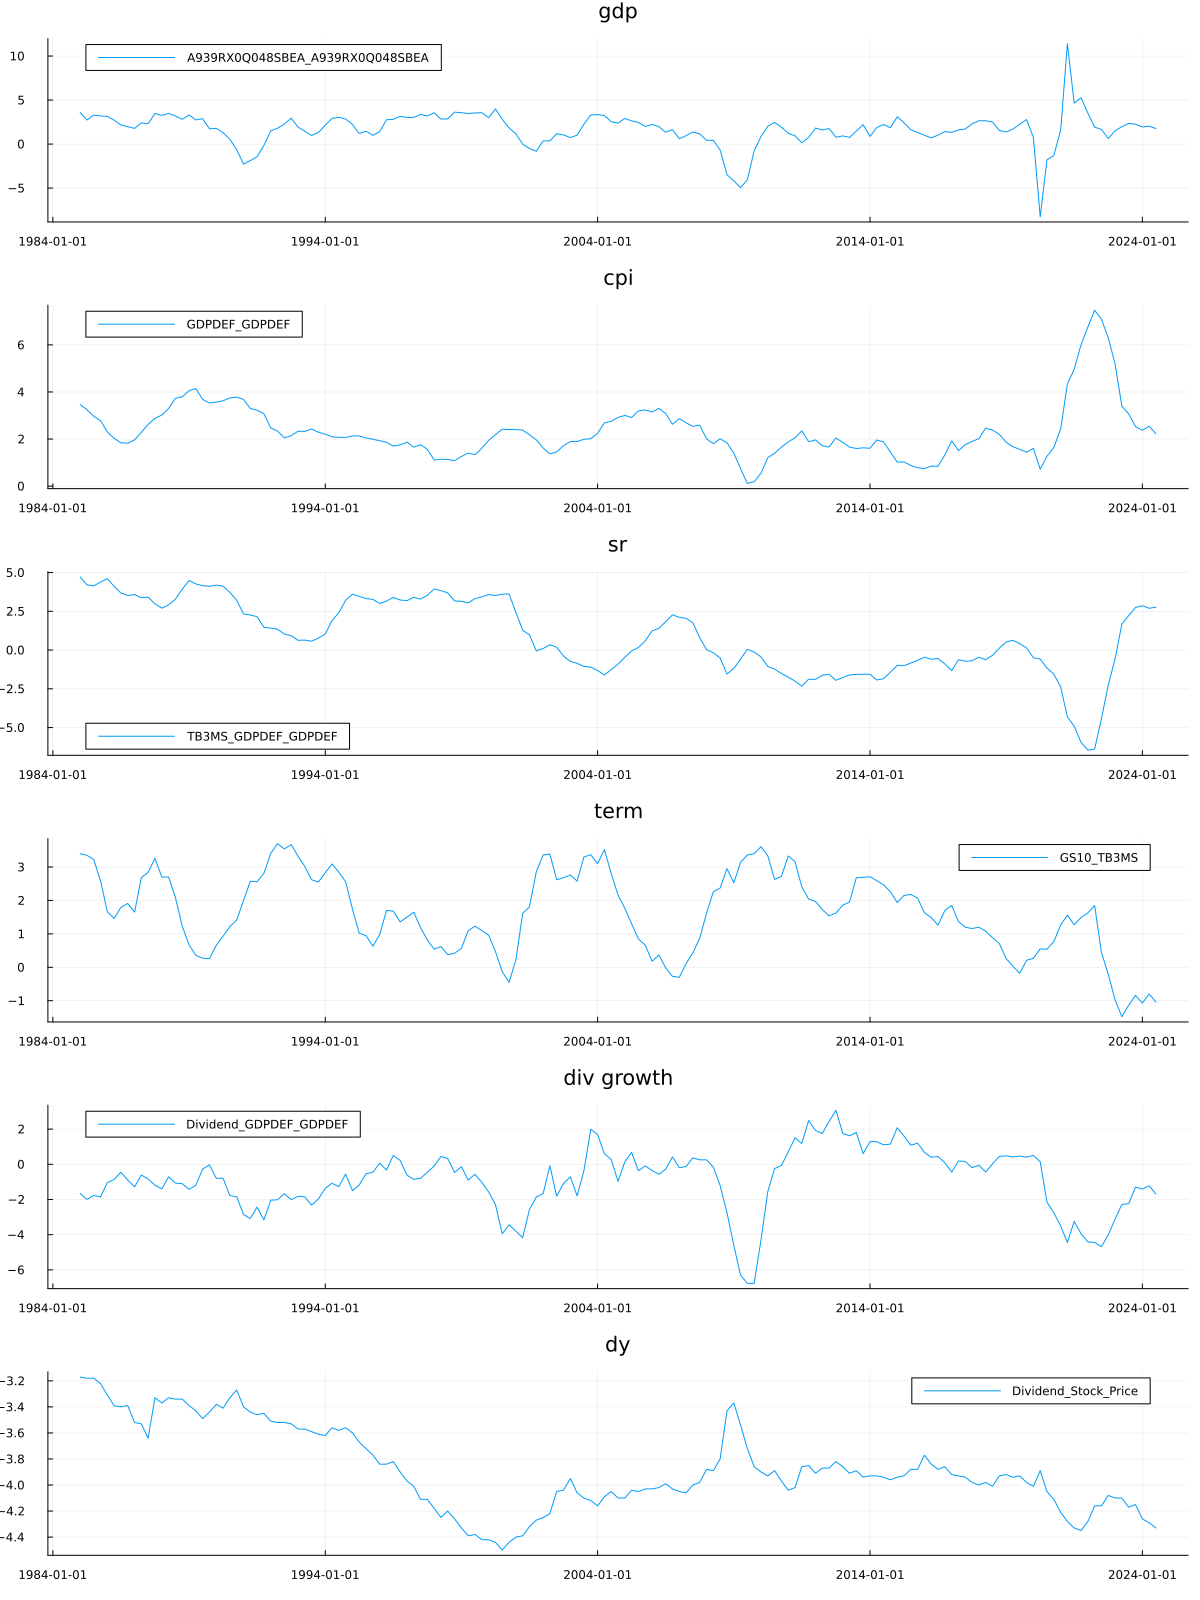

In [8]:
plot(s_data; layout = (6,1), size=(1200,1600), title=["gdp" "cpi" "sr" "term" "div growth" "dy"])

In [9]:
assets_names = colnames(s_data)
T, n_assets = size(s_data)
model = VARModel(s_data)
model_summary(model)

,const,A939RX0Q048SBEA_A939RX0Q048SBEA,GDPDEF_GDPDEF,TB3MS_GDPDEF_GDPDEF,GS10_TB3MS,Dividend_GDPDEF_GDPDEF,Dividend_Stock_Price,std
A939RX0Q048SBEA_A939RX0Q048SBEA,-2.7206,0.6622,-0.0118,0.0852,0.1712,-0.0057,-0.762,1.402
GDPDEF_GDPDEF,-0.1256,0.0664,0.9003,-0.0296,0.0289,-0.0299,-0.0483,0.3519
TB3MS_GDPDEF_GDPDEF,-0.1133,-0.0149,0.1698,0.9797,-0.0066,0.0331,0.0547,0.5019
GS10_TB3MS,0.307,-0.0471,-0.0803,0.0042,0.9214,-0.026,-0.0092,0.3985
Dividend_GDPDEF_GDPDEF,-0.0424,0.1219,-0.0966,-0.0224,0.0309,0.8599,0.0256,0.7359
Dividend_Stock_Price,-0.4298,-0.0042,0.0268,0.0047,0.0219,0.0127,0.9126,0.0657


,A939RX0Q048SBEA_A939RX0Q048SBEA,GDPDEF_GDPDEF,TB3MS_GDPDEF_GDPDEF,GS10_TB3MS,Dividend_GDPDEF_GDPDEF,Dividend_Stock_Price
A939RX0Q048SBEA_A939RX0Q048SBEA,1.0,0.41,-0.05,-0.07,0.03,-0.31
GDPDEF_GDPDEF,0.41,1.0,-0.63,0.18,-0.33,-0.06
TB3MS_GDPDEF_GDPDEF,-0.05,-0.63,1.0,-0.51,0.21,-0.15
GS10_TB3MS,-0.07,0.18,-0.51,1.0,0.02,0.17
Dividend_GDPDEF_GDPDEF,0.03,-0.33,0.21,0.02,1.0,0.04
Dividend_Stock_Price,-0.31,-0.06,-0.15,0.17,0.04,1.0


In [19]:
freq = 4
scenarios = simulate(model, 25*freq, 10_000)
#periods = [2,6, 16, 26]
periods_years = [1,5, 15, 25]

scenarios_years = scenarios[:,periods_years .*freq,:]



6×4×10000 Array{Float64, 3}:
[:, :, 1] =
  1.60367   1.10799   -0.720358   3.45
  1.59709   0.819466   4.25419    3.3527
  2.9983    2.50194   -0.591935   3.27936
 -0.43078   0.979317   1.93374    1.27355
 -1.16997   2.95013   -5.95994   -0.923711
 -4.37638  -4.0697    -3.94416   -4.16994

[:, :, 2] =
  2.9441     5.75841   -0.2696    4.08589
  2.89103    2.73646    2.77496   4.29433
  2.57954    0.602402  -1.72863  -2.70726
  0.652488   2.35595    1.85227   3.62477
 -1.2058     1.09443   -3.69748  -0.674129
 -4.35506   -3.7985    -3.77156  -3.82278

[:, :, 3] =
  3.93954  -0.524298  -0.601938   1.07608
  3.20441   1.89665    1.74016    2.36587
  1.87701   4.14911   -2.46701   -1.8077
 -1.26129  -0.549294   1.22028    1.74556
 -2.24752  -2.45024   -0.788391  -1.20429
 -4.46375  -4.75829   -4.22314   -4.18278

;;; … 

[:, :, 9998] =
  2.34001    2.83065    3.05417      0.83972
  1.70429    2.83805    2.9143       2.22055
  1.56076    3.107      0.942289    -1.4555
  1.05982    0.910063 

In [20]:
percentile(scenarios[3,5,:], [.25,.5,.75])

3-element Vector{Float64}:
 -0.24921515454135879
 -0.059581955038906675
  0.08975057317306952

In [22]:
cpi = cumsum(scenarios[2,2:4:101,:],dims=1)[periods_years,:] ./periods_years
sr = scenarios[2,:,:] + scenarios[3,:,:]
lr = scenarios[2,:,:] + scenarios[3,:,:] + scenarios[4,:,:]
Δd = (scenarios[2,:,:] + scenarios[5,:,:]) 
Δd_cum = cumsum(Δd[2:4:101,:],dims=1)[periods_years,:] ./periods_years
dy = exp.(scenarios[6, :,:])
eq_return = calculate_equity_returns(Δd, scenarios[6, :,:])
eq_return_cum = cumsum(eq_return[2:4:101,:],dims=1)[periods_years,:] ./periods_years
real_eq_return = eq_return[1:4:100,:] .- scenarios[2,1:4:100,:] ./ 100 
real_eq_return_cum = cumsum(real_eq_return, dims=1)[periods_years,:] ./periods_years
bond_returns = calculate_bond_returns(lr[1:4:101,:]./100, 10, 1)
bond_cum_returns = cumsum(bond_returns, dims=1)[periods_years,:] ./ periods_years


periods = periods_years.*freq.+1

print_scenarios_percentiles(cpi, [.01, 0.025, .05, .25, .5, .75, .95, .975, .99], string.([1, 5, 10, 25]), "cpi")
print_scenarios_percentiles(sr[periods,:], [.01, 0.025, .05, .25, .5, .75, .95, .975, .99], string.([1, 5, 10, 25]), "sr")
print_scenarios_percentiles(lr[periods,:], [.01, 0.025, .05, .25, .5, .75, .95, .975, .99], string.([1, 5, 10, 25]), "lr")
print_scenarios_percentiles(Δd_cum, [.01, 0.025, .05, .25, .5, .75, .95, .975, .99], string.([1, 5, 10, 25]), "div growth")
print_scenarios_percentiles(dy[periods,:], [.01, 0.025, .05, .25, .5, .75, .95, .975, .99], string.([1, 5, 10, 25]), "dy")
print_scenarios_percentiles(eq_return_cum, [.01, 0.025, .05, .25, .5, .75, .95, .975, .99], string.([1, 5, 10, 25]), "equity")
print_scenarios_percentiles(real_eq_return_cum, [.01, 0.025, .05, .25, .5, .75, .95, .975, .99], string.([1, 5, 10, 25]), "real equity")
print_scenarios_percentiles(bond_cum_returns, [.01, 0.025, .05, .25, .5, .75, .95, .975, .99], string.([1, 5, 10, 25]), "bonds")


,0.01,0.025,0.05,0.25,0.5,0.75,0.95,0.975,0.99
1,1.3407,1.4542,1.5688,1.9085,2.1506,2.3837,2.7199,2.8495,2.9968
5,0.6558,0.9056,1.1157,1.7374,2.1868,2.6369,3.2906,3.5016,3.7553
10,1.1605,1.3525,1.5227,2.0114,2.3471,2.6872,3.1958,3.3404,3.5297
25,1.4417,1.5856,1.7207,2.1083,2.3746,2.6413,3.0304,3.1459,3.2957


,0.01,0.025,0.05,0.25,0.5,0.75,0.95,0.975,0.99
1,2.3851,2.6625,2.9295,3.7257,4.3028,4.8613,5.714,5.9502,6.2699
5,-0.782,-0.1913,0.383,2.1403,3.3825,4.617,6.4566,7.0383,7.7565
10,-1.976,-1.2006,-0.5664,1.5017,2.9278,4.3689,6.3628,7.1099,7.8149
25,-2.1412,-1.2786,-0.6316,1.3987,2.847,4.271,6.3794,7.0506,7.7947


,0.01,0.025,0.05,0.25,0.5,0.75,0.95,0.975,0.99
1,2.3356,2.5965,2.8192,3.5667,4.0661,4.5654,5.3032,5.567,5.861
5,0.8657,1.3563,1.8088,3.1634,4.0957,5.0508,6.4348,6.9028,7.4301
10,0.3331,0.8599,1.3834,2.9249,4.0171,5.1377,6.7364,7.2324,7.8181
25,0.0994,0.7637,1.2623,2.8931,4.0188,5.1226,6.7109,7.2741,7.8476


,0.01,0.025,0.05,0.25,0.5,0.75,0.95,0.975,0.99
1,-1.0998,-0.9035,-0.7045,-0.0117,0.448,0.9272,1.6078,1.8071,2.0859
5,-1.1953,-0.8739,-0.5706,0.3243,0.952,1.5819,2.4805,2.7769,3.0941
10,-0.077,0.1269,0.3345,0.9335,1.354,1.7773,2.3674,2.5505,2.8031
25,0.2289,0.4302,0.5909,1.0621,1.3965,1.738,2.2215,2.3727,2.5636


,0.01,0.025,0.05,0.25,0.5,0.75,0.95,0.975,0.99
1,0.0089,0.0093,0.0097,0.011,0.012,0.013,0.0148,0.0154,0.016
5,0.0073,0.0081,0.0086,0.0113,0.0134,0.016,0.0205,0.0221,0.0246
10,0.0082,0.0092,0.01,0.0133,0.0163,0.0199,0.0266,0.029,0.0316
25,0.0084,0.0093,0.0103,0.0137,0.0167,0.0204,0.0276,0.0301,0.0338


,0.01,0.025,0.05,0.25,0.5,0.75,0.95,0.975,0.99
1,-0.112,-0.087,-0.0669,-0.0017,0.0421,0.0852,0.1483,0.1693,0.1917
5,-0.0448,-0.034,-0.0247,0.0032,0.0228,0.0421,0.0698,0.0792,0.0903
10,-0.0134,-0.0074,-0.002,0.014,0.0253,0.0364,0.0524,0.0575,0.0637
25,-0.0022,0.0025,0.0064,0.019,0.0278,0.0362,0.0487,0.0527,0.0573


,0.01,0.025,0.05,0.25,0.5,0.75,0.95,0.975,0.99
1,-0.1276,-0.101,-0.0803,-0.016,0.0269,0.0697,0.1326,0.1526,0.1774
5,-0.0672,-0.0545,-0.0464,-0.0176,0.0028,0.023,0.052,0.0615,0.0719
10,-0.0391,-0.0331,-0.0273,-0.0101,0.002,0.014,0.0313,0.0365,0.0429
25,-0.0285,-0.0237,-0.0191,-0.0056,0.0038,0.0134,0.0267,0.0312,0.0364


,0.01,0.025,0.05,0.25,0.5,0.75,0.95,0.975,0.99
1,-0.0927,-0.0738,-0.0564,-0.0055,0.0308,0.0688,0.1288,0.1475,0.1699
5,0.0037,0.0092,0.0139,0.0284,0.0395,0.0508,0.0685,0.075,0.0828
10,0.0215,0.0246,0.0272,0.0357,0.0417,0.0475,0.0565,0.0596,0.0632
25,0.0223,0.0254,0.028,0.0359,0.0414,0.0473,0.0555,0.0585,0.0619


In [13]:
mdd, mddl = max_drawdown_and_length(eq_return)

display(" equity")
display("mdd")
display(quantile(mdd, [.03, .25, .5, .75, .97])')
display("mddl")
display(quantile(mddl, [.03, .25, .5, .75, .97])')

" equity"

"mdd"

1×5 adjoint(::Vector{Float64}) with eltype Float64:
 0.150047  0.21331  0.261345  0.321651  0.456718

"mddl"

1×5 adjoint(::Vector{Float64}) with eltype Float64:
 8.0  13.0  17.0  23.0  38.0

In [14]:
B = collect(model.C[2:end,:]')

resp = girf(B, model.Σ, 8, 2)

plot(resp; layout = (6,1), size=(1200,1600), title=["gdp" "cpi" "sr" "term" "div growth" "dy"])

MethodError: MethodError: no method matching girf(::Matrix{Float64}, ::Matrix{Float64}, ::Int64, ::Int64)
The function `girf` exists, but no method is defined for this combination of argument types.

Closest candidates are:
  girf(::Matrix{Float64}, ::Matrix{Float64}, ::Int64, ::Int64, !Matched::Any)
   @ Main c:\Users\matsz\programowanie\Optymalizacja_portfela\FinancialPlanner\_wip\VARs\utils.jl:213


In [15]:
display(exp(-3.8 ) *100) 
display(exp(-3.8 + 0.08)*100) 
display((exp(-3.8 ) - exp(-3.8 + 0.08))*100) 
display(0.0224*exp((0.06^2)-1)^.5 *100)
display(exp(-4.8 ) *100) 

2.23707718561656

2.4233967845691122

-0.1863195989525522

1.3610764116758998

0.822974704902003

IRF returns
- estimate dy, and div idnex, based on initial value, mean?
- estimate returns?
- 

In [16]:
resp

UndefVarError: UndefVarError: `resp` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [17]:
real_Δd = resp[:,2] + resp[:,5]




UndefVarError: UndefVarError: `resp` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [18]:
dy = exp.(scenarios[6, :,:])

101×10000 Matrix{Float64}:
 0.0131675   0.0131675  0.0131675  …  0.0131675  0.0131675  0.0131675
 0.0139552   0.0137762  0.0119381     0.0133974  0.0128494  0.0114851
 0.0135358   0.0130386  0.012176      0.0123983  0.0133034  0.0118136
 0.0128334   0.0143848  0.0116659     0.0138867  0.0135226  0.0121942
 0.0136026   0.0129543  0.0124929     0.0148639  0.012645   0.0124045
 0.0135366   0.0127814  0.0111946  …  0.015374   0.0122519  0.0121432
 0.0145726   0.0142505  0.0114815     0.0160289  0.0125717  0.0119656
 0.014164    0.0140194  0.0108782     0.0167643  0.0128747  0.0105954
 0.0138074   0.0128872  0.0103548     0.0176444  0.010791   0.0118353
 0.0133697   0.0129437  0.0116026     0.0171168  0.010817   0.0129733
 ⋮                                 ⋱                        
 0.00924307  0.013083   0.0129391     0.0184037  0.0140151  0.0302629
 0.00909564  0.0139714  0.0133207     0.0195706  0.0137306  0.0287492
 0.00895699  0.0143569  0.012891      0.0205762  0.0133465  0.0277737
 0